
<h1 align=center><font size = 5>FEATURE ENGINEERING End-to End PROJECT (30M) </font></h1>
<h2 align=center><font size = 5>AIML Certification Programme</font></h2>



## Student Name and ID:
Mention your name and ID if done individually<br>
If done as a group,clearly mention the contribution from each group member qualitatively and as a precentage.<br>
1.   Preethi Carmel Bosco <br>   ID 2023AIML573                    



## Business Understanding (1M)

Students are expected to identify a regression problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.

   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?What are the different sources of data?
   

<h1>1. What is the business problem that you are trying to solve?</h1>
The BUsiness problem we are trying to solve is "Bringing predictability to housing prices". 
Currently with out any housing price predictor it is difficult for both buyer and seller to rightly price the house.
The rationale behind a particular price set fo rthe house is also not clear to understand.
Since price of the house is a big investment for most buyer they will like to get a probable price based on current and past market trend.
Also this prediction will help buyers understand
<li> How much the house can be later sold at,
<Li> What is the Year on year appreciation in price,
<li> Which localities appreciate most
<li> What is the mortage value of a property
<li> List of options that can raise the property price

<h1> 2. What data do you need to answer the above problem?What are the different sources of data?</h1>
we will need housing price data with various feature and dimensions like SalePrice,Location,Utilities,Neighborhood,Condition,number of bed rooms and bath rooms
The dataset is a housing dataset presented by De Cock (2011). The data came to him directly from the Ames City Assessor’s Office in the form of a data dump from their records system. The original Excel file contained 113 variables describing 3970 property sales that had occurred in Ames, Iowa between 2006 and 2010. However, so that the dataset could be used as a “layman’s” data set that could be easily understood by users at all levels he removed any variables that required special knowledge or previous calculations for their use. Most of these deleted variables were related to weighting and adjustment factors used in the city’s current modelling system.

## Data Requirements and Data Collection (3+1M)<a id="0"></a>

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab2_fig1_flowchart_data_requirements.png" width=500>

In the initial data collection stage, data scientists identify and gather the available data resources. These can be in the form of structured, unstructured, and even semi-structured data relevant to the problem domain.

Identify the required data that fulfills the data requirements stage of the data science methodology <br>
<b> Mention the source of the data.(Give the link if you have sourced it from any public data set)
Briefly explain the data set identified .</b>

Based on the business use case and requirement we can us ethe public kaggle data set of ames housing prices
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/


The dataset contains 2930 records (rows) and 82 features (columns) which will be used to predict our target column which is Sales Price i.e the amount the apartment or house sell for considering different conditions.

 Import the above data and read it into a data frame 

In [385]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [386]:
# load the csv file in a pandas data frame using function read_csv
Housing_df = pd.read_csv('train.csv')
Housing_df1 = Housing_df # copy of df to work with


Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [387]:
# print first 5 records of dataframe Housing_df1
print(Housing_df1.head(5))
# print last 5 records of dataframe Housing_df1
print(Housing_df1.tail(5))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Get the dimensions of the dataframe.

In [388]:
print(Housing_df1.shape)

(1462, 81)


In [389]:
# print only column heads
Col_list = Housing_df1.columns
print(Col_list)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

There are 1460 records with 81 columns.

Display the description and statistical summary of the data.

In [390]:
for col in Housing_df1.columns:
    print(f"\n{col} \n")
    print(Housing_df1[col].describe())


Id 

count    1462.00000
mean      731.50000
std       422.18736
min         1.00000
25%       366.25000
50%       731.50000
75%      1096.75000
max      1462.00000
Name: Id, dtype: float64

MSSubClass 

count    1462.000000
mean       56.846785
std        42.293616
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

MSZoning 

count     1462
unique       5
top         RL
freq      1153
Name: MSZoning, dtype: object

LotFrontage 

count    1203.000000
mean       70.052369
std        24.265032
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

LotArea 

count      1462.000000
mean      10515.884405
std        9974.464229
min        1300.000000
25%        7558.500000
50%        9485.000000
75%       11600.000000
max      215245.000000
Name: LotArea, dtype: float64

Street 

count     1462
unique       2
top       

Dropping the column ID

In [391]:
Housing_df1 = Housing_df1.drop('Id', axis=1)

Display the columns and their respective data types.

In [392]:
import types
#for col in Housing_df1.columns:
    #print(f"{col}       {type(Housing_df1[col][1])} \n") # index 1 to get sample data and its type
categorial_columns=[]
Numerical_columns=[]
for i in Housing_df1.iloc[1].index:
    if isinstance(Housing_df1[i].values[0],(np.floating,np.integer)):  
        Numerical_columns.append(i)
    else:
        categorial_columns.append(i)
print (len(categorial_columns))
print (len(Numerical_columns))


43
37


In [393]:
#discrete or ordinal?
discrete_columns=[]
continous_columns=[]
date_columns=[]

#for i in Numerical_columns:# discrete and continous
    ##if len(Housing_df1[i].unique())<15: # we can analyse them for nominal or ordinal
        #print(f"\n {i}\n")
        #print(Housing_df1[i].unique())
ordinal_columns =['PoolQC','GarageQual', 'GarageCond', 'KitchenQual','ExterQual','ExterCond', 'BsmtQual','BsmtCond','HeatingQC','OverallQual', 'OverallCond','FireplaceQu']

print(len(Numerical_columns))
print(len(categorial_columns))
## figuring ordinal columns
for i in ordinal_columns:
    if i in Numerical_columns:
        Numerical_columns.remove(i)   
    if i in categorial_columns:
        categorial_columns.remove(i)    



##figuring out continous and discrete columns

for i in Numerical_columns:
    #print(type(Housing_df1[i].iloc[1]))
    if isinstance(Housing_df1[i].iloc[1], np.floating):
        continous_columns.append(i)          
    elif isinstance(Housing_df1[i].iloc[1], np.integer):
        discrete_columns.append(i)
    else:
        print("wronglg classified as numeric")  
        print(i) 
        print(type(Housing_df1[i].iloc[1]))           

## figuring date columns        
for i in Housing_df1.columns:
    
    if ("mo".upper() in i.upper()) or  ("yr".upper() in i.upper()) or  ("year".upper() in i.upper()):     
        date_columns.append(i)
        if i in Numerical_columns:
            Numerical_columns.remove(i)
        if i in discrete_columns:
            discrete_columns.remove(i)
        if i in categorial_columns:
            categorial_columns.remove(i)
        if i in continous_columns:
            continous_columns.remove(i)
        if i in ordinal_columns:
            ordinal_columns.remove(i)
print("categorial_columns ")
print(len(categorial_columns))
print(categorial_columns)
print("Numerical_columns")
print(len(Numerical_columns))
print((Numerical_columns))
print("discrete_columns")
print(len(discrete_columns))
print((discrete_columns))
print("continous_columns")
print(len(continous_columns))
print(continous_columns)
print("date_columns")
print(len(date_columns))
print(date_columns)
print("ordinal_columns")
print(len(ordinal_columns))
print((ordinal_columns))

37
43
categorial_columns 
33
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical_columns
30
['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
discrete_columns
28
['MSSubClass', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUn

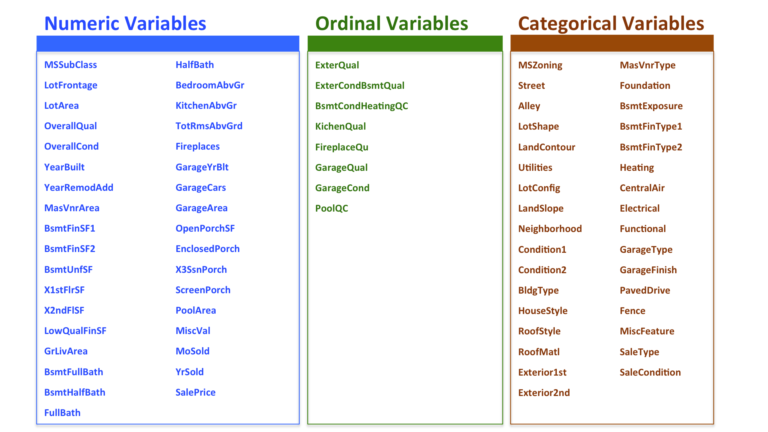

Other than dates,OverallQual,OverallCond other attributes are numerical

from analysis we see that other than OverallCond,OverallQual and date attributes, all other attribute sare discrete nummerical.

In [394]:
Housing_df1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1462 non-null   int64  
 1   MSZoning       1462 non-null   object 
 2   LotFrontage    1203 non-null   float64
 3   LotArea        1462 non-null   int64  
 4   Street         1462 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1462 non-null   object 
 7   LandContour    1462 non-null   object 
 8   Utilities      1462 non-null   object 
 9   LotConfig      1462 non-null   object 
 10  LandSlope      1462 non-null   object 
 11  Neighborhood   1462 non-null   object 
 12  Condition1     1462 non-null   object 
 13  Condition2     1462 non-null   object 
 14  BldgType       1462 non-null   object 
 15  HouseStyle     1462 non-null   object 
 16  OverallQual    1462 non-null   int64  
 17  OverallCond    1462 non-null   int64  
 18  YearBuil

Convert the columns to appropriate data types

The dataset has appropiate data types set already, Encoding and column derivation willbe done after clean up 

#### Write your observations from the above.


From the above we can find the data type of the features 
We have multiple values  missing values which has to handled after analysis.
The data further needs to be visualized to find the distribution and get more initution

### Check for Data Quality Issues (1.5M)

* duplicate data
* missing data
* data inconsistencies

In [395]:
# Missing data count
missing_data = Housing_df1.isnull().sum()
missing_percentage = (missing_data / len(Housing_df1)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_info)
print(missing_info[missing_info['Missing Values'] > 0])

               Missing Values  Percentage
MSSubClass                  0    0.000000
MSZoning                    0    0.000000
LotFrontage               259   17.715458
LotArea                     0    0.000000
Street                      0    0.000000
...                       ...         ...
MoSold                      0    0.000000
YrSold                      0    0.000000
SaleType                    0    0.000000
SaleCondition               0    0.000000
SalePrice                   0    0.000000

[80 rows x 2 columns]
              Missing Values  Percentage
LotFrontage              259   17.715458
Alley                   1371   93.775650
MasVnrType               874   59.781122
MasVnrArea                 8    0.547196
BsmtQual                  37    2.530780
BsmtCond                  37    2.530780
BsmtExposure              38    2.599179
BsmtFinType1              37    2.530780
BsmtFinType2              38    2.599179
Electrical                 1    0.068399
FireplaceQu           

In [396]:
# checking for duplicate records with same value for YrSold, LotArea, SalePrice
# Creating a DataFrame object
df_temp = pd.DataFrame(Housing_df1[['YrSold', 'LotArea', 'SalePrice','YearBuilt','GrLivArea']])
 
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df_temp[df_temp.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,YrSold,LotArea,SalePrice,YearBuilt,GrLivArea
193,2006,2522,130000,2004,1709
1460,2010,9717,142125,1950,1078
1461,2008,9937,147500,1965,1256


Data inconsistency

Fromdocumentation we understand that following inconsistency are expected null values
Alley means no alley
Bsmt* means no basement
FireplaceQu means no fireplace
Garage* means no garage
expect missing values for GarageYrBlt as its same as house year built
PoolQC meansno pool
Fence means no fence
MiscFeature means no such item as an elevator, tennis court, second garage, etc...


In [397]:
print (missing_info[missing_info['Missing Values'] > 0].index)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


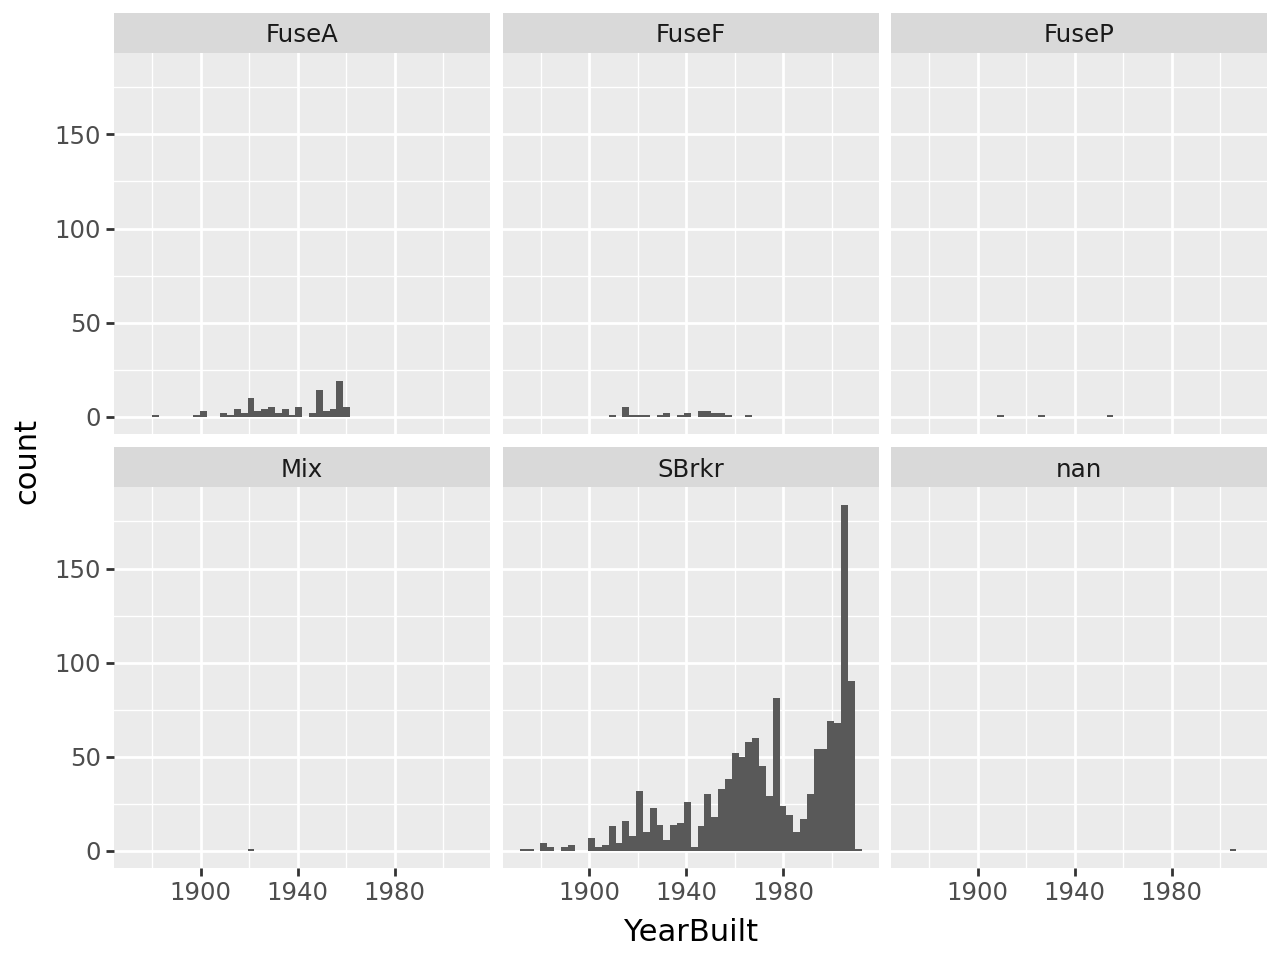

In [398]:
from plotnine import ggplot, aes, geom_line,geom_histogram,facet_wrap
( ggplot(Housing_df1, aes("YearBuilt"))
   + geom_histogram(bins = 50) 
   + facet_wrap("Electrical")
)

 the above plot it seems safe to impute null values in Electrical as "SBrkr" seeing as that type is dominant over the time period

### Handling the data quality issues(1.5M)
Apply techniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies <br>
Give detailed explanation for each column how you handle the data quality issues.


dropping duplicate data

In [399]:

i = [193,1460,1461]
Housing_df1.drop(i,inplace=True)
print(Housing_df1.shape)

(1459, 80)


Remove data inconsistency and impute data

In [400]:
import warnings
warnings.filterwarnings('ignore')

MODE AND MEAN IMPUTATION

In [401]:
# imputing the categorial variable values with mode .this willcause teh current skew to be emphasised.
#imputing numericals with mean.
Alley_impute= Housing_df1['Alley'].mode()
BsmtQual_impute= Housing_df1['BsmtQual'].mode()
BsmtCond_impute= Housing_df1['BsmtCond'].mode()
BsmtExposure_impute= Housing_df1['BsmtExposure'].mode()
BsmtFinType1_impute= Housing_df1['BsmtFinType1'].mode()
BsmtFinType2_impute= Housing_df1['BsmtFinType1'].mode()
FireplaceQu_impute= Housing_df1['FireplaceQu'].mode()
GarageType_impute= Housing_df1['GarageType'].mode()
GarageFinish_impute= Housing_df1['GarageFinish'].mode()
GarageQual_impute= Housing_df1['GarageQual'].mode()
GarageCond_impute= Housing_df1['GarageCond'].mode()
PoolQC_impute= Housing_df1['PoolQC'].mode()
Fence_impute= Housing_df1['Fence'].mode()
MiscFeature_impute= Housing_df1['MiscFeature'].mode()
Electrical_impute= Housing_df1['Electrical'].mode()
MasVnrType_impute= Housing_df1['MasVnrType'].mode()
MasVnrArea_impute= Housing_df1['MasVnrArea'].mean()
LotFrontage_impute= Housing_df1['LotFrontage'].mean()
#for garage buit fill with year buit
Housing_df1['GarageYrBlt'].fillna(Housing_df1['YearBuilt'],inplace=True)
       


In [402]:
# setting with nullalternative values
Housing_df1.Alley.fillna(Alley_impute.values[0],inplace=True) #
Housing_df1.BsmtQual.fillna(BsmtQual_impute.values[0],inplace=True)
Housing_df1.BsmtCond.fillna(BsmtCond_impute.values[0],inplace=True)
Housing_df1.BsmtExposure.fillna(BsmtExposure_impute.values[0],inplace=True)
Housing_df1.BsmtFinType1.fillna(BsmtFinType1_impute.values[0],inplace=True)
Housing_df1.BsmtFinType2.fillna(BsmtFinType2_impute.values[0],inplace=True)
Housing_df1.FireplaceQu.fillna(FireplaceQu_impute.values[0],inplace=True)
Housing_df1.GarageType.fillna(GarageType_impute.values[0],inplace=True)
Housing_df1.GarageFinish.fillna(GarageFinish_impute.values[0],inplace=True)
Housing_df1.GarageQual.fillna(GarageQual_impute.values[0],inplace=True)
Housing_df1.GarageCond.fillna(GarageCond_impute.values[0],inplace=True)
Housing_df1.PoolQC.fillna(PoolQC_impute.values[0],inplace=True)
Housing_df1.Fence.fillna(Fence_impute.values[0],inplace=True)
Housing_df1.MiscFeature.fillna(MiscFeature_impute.values[0],inplace=True)
Housing_df1.Electrical.fillna(Electrical_impute.values[0],inplace=True)
Housing_df1.MasVnrType.fillna(MasVnrType_impute.values[0],inplace=True)
Housing_df1.MasVnrArea.fillna(MasVnrArea_impute,inplace=True)
Housing_df1.LotFrontage.fillna(LotFrontage_impute,inplace=True)
#Housing_df1.GarageYrBlt.fillna(GarageYrBlt_impute,inplace=True)


Chceking for presence of null values

In [403]:
#Housing_df1 = fillwithnull(Housing_df1)
# Missing data count
missing_data = Housing_df1.isnull().sum()
missing_percentage = (missing_data / len(Housing_df1)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_info[missing_info['Missing Values'] > 0])
#print(Housing_df1.isnull().sum().sort_values(ascending=False))


Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


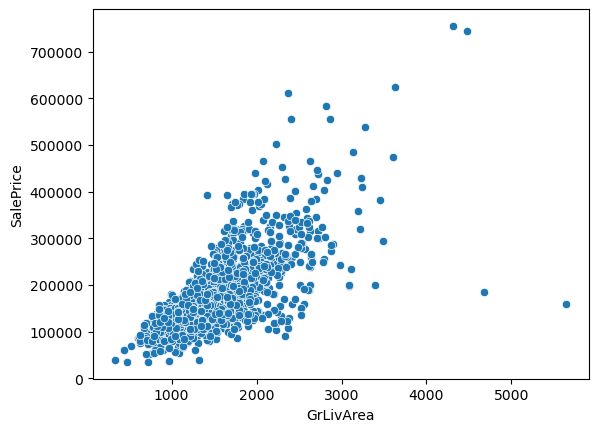

In [404]:
sns.scatterplot(data=Housing_df1,x="GrLivArea",y="SalePrice")
plt.show()

deleting outliers records from data set

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

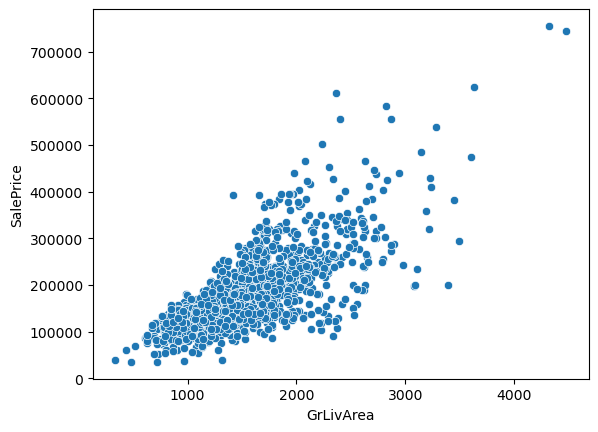

In [405]:
outliers = ((Housing_df1.GrLivArea > 4000) & (Housing_df1.SalePrice < 5E5))
Housing_df1 =  Housing_df1[~(outliers)]
sns.scatterplot(data=Housing_df1,x="GrLivArea",y="SalePrice")

### Normalise the data wherever necessary(1M)

Normalization refers to the process of transforming features in a dataset to a specific range. This range can be different depending on the chosen normalization technique. The two most common normalization techniques are Min-Max Scaling and Z-Score Normalization, which is also called Standardization

MIN MAX scaling normalisation of numerical attributes

In [406]:
print(discrete_columns)
print(Housing_df1[discrete_columns])

['MSSubClass', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
      MSSubClass  LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             60     8450         706           0        150          856   
1             20     9600         978           0        284         1262   
2             60    11250         486           0        434          920   
3             70     9550         216           0        540          756   
4             60    14260         655           0        490         1145   
...          ...      ...         ...         ...        ...          ...   
1455          60     7917           0           0        953          

In [407]:
print(Housing_df1[discrete_columns])
for i in discrete_columns:
    max_i = Housing_df1[i].max()
    min_i = Housing_df1[i].min()
    Range_i = max_i -min_i
    scaled_i = (Housing_df1[i] - min_i)/Range_i
    Housing_df1[i] = scaled_i
print(Housing_df1[discrete_columns])    

      MSSubClass  LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             60     8450         706           0        150          856   
1             20     9600         978           0        284         1262   
2             60    11250         486           0        434          920   
3             70     9550         216           0        540          756   
4             60    14260         655           0        490         1145   
...          ...      ...         ...         ...        ...          ...   
1455          60     7917           0           0        953          953   
1456          20    13175         790         163        589         1542   
1457          70     9042         275           0        877         1152   
1458          20     9717          49        1029          0         1078   
1459          20     9937         830         290        136         1256   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  GarageCars  \
0    

### Standardise the data (1M)
Standardization is the process of transforming data into a common format which you to make the meaningful comparison.

Standardization is a preprocessing step that’s commonly applied to numerical features in machine learning. The goal of standardization is to transform the feature values so that they have a mean of 0 and a standard deviation of 1.

In [408]:
print(Housing_df1[discrete_columns])
from sklearn.preprocessing import StandardScaler
Housing_df1[discrete_columns] = StandardScaler().fit_transform(Housing_df1[discrete_columns])
print(Housing_df1[discrete_columns])

      MSSubClass   LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0       0.235294  0.033420    0.322669    0.000000   0.064212     0.266999   
1       0.000000  0.038795    0.446984    0.000000   0.121575     0.393637   
2       0.235294  0.046507    0.222121    0.000000   0.185788     0.286962   
3       0.294118  0.038561    0.098720    0.000000   0.231164     0.235808   
4       0.235294  0.060576    0.299360    0.000000   0.209760     0.357143   
...          ...       ...         ...         ...        ...          ...   
1455    0.235294  0.030929    0.000000    0.000000   0.407962     0.297255   
1456    0.000000  0.055505    0.361060    0.110583   0.252140     0.480973   
1457    0.294118  0.036187    0.125686    0.000000   0.375428     0.359326   
1458    0.000000  0.039342    0.022395    0.698100   0.000000     0.336245   
1459    0.000000  0.040370    0.379342    0.196744   0.058219     0.391765   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  GarageC

### Perform Binning (1M)
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

In [409]:
print(Housing_df1[continous_columns])

      LotFrontage  MasVnrArea
0            65.0       196.0
1            80.0         0.0
2            68.0       162.0
3            60.0         0.0
4            84.0       350.0
...           ...         ...
1455         62.0         0.0
1456         85.0       119.0
1457         66.0         0.0
1458         68.0         0.0
1459         75.0         0.0

[1457 rows x 2 columns]


In [425]:
# using unsepervised binning of equal width
min =Housing_df1['LotFrontage'].min()
max =Housing_df1['LotFrontage'].max()
range_temp=( max - min)
bin =[min,min+(range_temp*0.25),min+(range_temp*0.5),min+(0.75*range_temp),max] 
print(bin)
labels = ['Small', 'Medium', 'Large', 'Verylarge']
Housing_df1['LotFrontage_bin'] = pd.cut(Housing_df1['LotFrontage'], bin,labels=labels)
print(Housing_df1['LotFrontage_bin'].unique())
print(Housing_df1['LotFrontage_bin'].isna().sum())

[21.0, 94.0, 167.0, 240.0, 313.0]
['Small', 'Medium', NaN, 'Large', 'Verylarge']
Categories (4, object): ['Small' < 'Medium' < 'Large' < 'Verylarge']
23


In [438]:
# using unsepervised binning of equal width
min =Housing_df1['MasVnrArea'].min()
max =Housing_df1['MasVnrArea'].max()
range_temp=( max - min)
bin =[min,min+(range_temp*0.25),min+(range_temp*0.5),min+(0.75*range_temp),max] 
print(bin)
labels = ['Small', 'Medium', 'Large', 'Verylarge']
Housing_df1['MasVnrArea_bin'] = pd.cut(Housing_df1['MasVnrArea'], bin,labels=labels)
print(Housing_df1['MasVnrArea_bin'].isna().sum())
nan_rows = Housing_df1['MasVnrArea_bin'].isna()
#print(nan_rows)
for i, (nan_rows_i) in enumerate(nan_rows):
    if(nan_rows_i):
        print(Housing_df1[['MasVnrArea','MasVnrArea_bin']].iloc[i])

[0.0, 400.0, 800.0, 1200.0, 1600.0]
861
MasVnrArea        0.0
MasVnrArea_bin    NaN
Name: 1, dtype: object
MasVnrArea        0.0
MasVnrArea_bin    NaN
Name: 3, dtype: object
MasVnrArea        0.0
MasVnrArea_bin    NaN
Name: 5, dtype: object
MasVnrArea        0.0
MasVnrArea_bin    NaN
Name: 8, dtype: object
MasVnrArea        0.0
MasVnrArea_bin    NaN
Name: 9, dtype: object
MasVnrArea        0.0
MasVnrArea_bin    NaN
Name: 10, dtype: object
MasVnrArea        0.0
MasVnrArea_bin    NaN
Name: 12, dtype: object
MasVnrArea        0.0
MasVnrArea_bin    NaN
Name: 15, dtype: object
MasVnrArea        0.0
MasVnrArea_bin    NaN
Name: 17, dtype: object
MasVnrArea        0.0
MasVnrArea_bin    NaN
Name: 18, dtype: object
MasVnrArea        0.0
MasVnrArea_bin    NaN
Name: 19, dtype: object
MasVnrArea        0.0
MasVnrArea_bin    NaN
Name: 21, dtype: object
MasVnrArea        0.0
MasVnrArea_bin    NaN
Name: 23, dtype: object
MasVnrArea        0.0
MasVnrArea_bin    NaN
Name: 24, dtype: object
MasVnrArea   

We get NAN bin for 0 value soimputing it to small bin

In [447]:
Housing_df1['MasVnrArea_bin'].fillna("Small",inplace=True)
Housing_df1['LotFrontage_bin'].fillna("Small",inplace=True)
print(Housing_df1['LotFrontage_bin'].unique())
print(Housing_df1['MasVnrArea_bin'].unique())

['Small', 'Medium', 'Large', 'Verylarge']
Categories (4, object): ['Small' < 'Medium' < 'Large' < 'Verylarge']
['Small', 'Medium', 'Large', 'Verylarge']
Categories (4, object): ['Small' < 'Medium' < 'Large' < 'Verylarge']


### Perform encoding (1M)

### Perform Data Discretization(2M)

### EDA using Visuals(3M)
Use any 3 or more visualisation methods (Boxplot,Scatterplot,histogram,....etc) to perform Exploratory data analysis and briefly give interpretations from each visual.


### Feature Selection(2M)

Apply Univariate filters identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
<br>(From the above 5 you are required to use any <b>two</b>)

### Report observations (2M)

Write your observations from the results of each of the above method(1M). Clearly justify your choice of the method.(1M)

### Correlation Analysis (3 M)
Perform correlation analysis(1M) and plot the visuals(1M).Briefly explain each process,why is it used and interpret the result(1M).

### Model Building and Prediction (4M)

Fit a linear regression model using the most important features identified(1M).Plot the visuals(1M).Briefly explain the regression model,equation (1M) and perform one prediction using the same(1M).

### Observations and Conclusions(1M)

###  Solution (1M)

What is the solution that is proposed to solve the business problem discussed in the beginning. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.